# MATH 525 - Statistics I, Fall 2021
## Assignment 3 - Konstantinos Georgiou
Due: Monday, October 8, by 8:00PM

## Initializations

In [1]:
# Imports
import numpy as np
from scipy.io import loadmat
from scipy.stats import beta as beta_dist, norm
from scipy.optimize import fminbound, fmin
from scipy.special import erfc, gammainc, beta as beta_func, gamma as gamma_func
import matplotlib as mpl
from matplotlib import pyplot as plt
from typing import *
from tqdm.notebook import tqdm

## Problem 1(i) - Use ancestral sampling to approximate empirically p(w)

In [2]:
def get_normal(mu: float, sigma: float,
               size: Union[float, Iterable[float]] = 1) -> np.ndarray:
  return np.random.normal(mu, sigma, size)

def get_gamma(phi: float, psi: float, size: Union[float, Iterable[float]] = 1) \
                                              -> Union[float, Iterable[float]]:
  return np.random.gamma(phi, psi, size)

def ancestral_sampling(phi: float, psi: float, m: float, n: float, 
                       n_samples: int, size: Union[float, Iterable[float]] = 1):
  sampled = {"tau": [], "mu": [], "w": []}
  mean_ws = []
  for _ in tqdm(range(n_samples)):
    tau = get_gamma(phi=phi, psi=psi)
    sampled["tau"].append(tau)
    mu = get_normal(mu=m, sigma=n/tau)
    sampled["mu"].append(mu)
    w = get_normal(mu, 1/tau)
    sampled["w"].append(w)
    mean_w = sum(sampled["w"])/len(sampled["w"])
    mean_ws.append(mean_w)
  
  for key, val in sampled.items():
    sampled[key] = [float(a) for a in sampled[key]]

  return sampled, mean_ws

In [3]:
# Known values
phi = 2
psi = 2.5
m = 10
n = 1
n_samples = 10000
size = 1

# Derive p(w)
sampled, mean_ws = ancestral_sampling(phi, psi, m, n, n_samples, size)

  0%|          | 0/10000 [00:00<?, ?it/s]

Plot


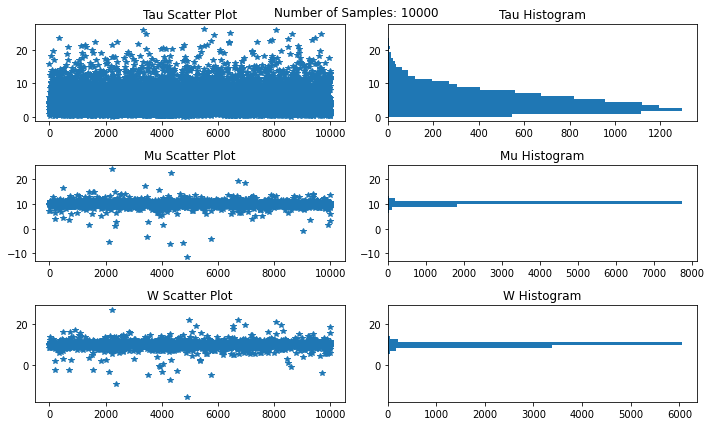

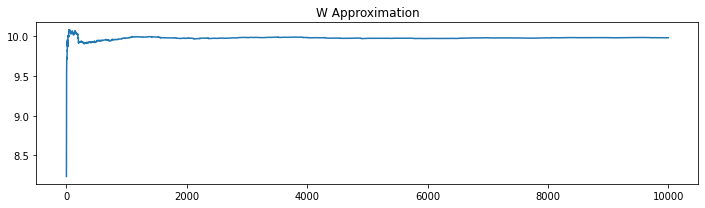

In [4]:
print("Plot")
# Create figure
fig, ax = plt.subplots(3, 2, figsize=(10, 6))
fig.suptitle(f"Number of Samples: {n_samples}")
# Create x
x = np.arange(len(mean_ws))
# Plots
ax[0][0].plot(x, sampled["tau"], '*')
ax[0][1].hist(sampled["tau"], bins=30, orientation='horizontal')
ax[0][0].set_title("Tau Scatter Plot")
ax[0][1].set_title("Tau Histogram")

ax[1][0].plot(x, sampled["mu"], '*')
ax[1][1].hist(sampled["mu"], bins=30, orientation='horizontal')
ax[1][0].set_title("Mu Scatter Plot")
ax[1][1].set_title("Mu Histogram")

ax[2][0].plot(x, sampled["w"], '*')
ax[2][1].hist(sampled["w"], bins=30, orientation='horizontal')
ax[2][0].set_title("W Scatter Plot")
ax[2][1].set_title("W Histogram")

fig.tight_layout()


fig2, ax2 = plt.subplots(1, 1, figsize=(9.9, 3))
ax2.plot(x, mean_ws, '-')
ax2.set_title("W Approximation")
fig2.tight_layout()

## Problem 1(iii)

In [5]:
def derive(w, mu, tau, phi, psi, n, m) -> np.ndarray:
  
  f_1 = tau**phi
  f_2_exp = -((mu-m)**2)/(2*n) - ((w-mu)**2)/2 - psi
  f_2 = np.exp(tau * f_2_exp)
  f_3 = gamma_func(1+phi)
  results = f_1*f_2/f_3

  return results

phi = 2
psi = 2.5
m = 10
n = 1
size = 100

tau = np.linspace(0.1, 50, size)
mu = np.linspace(-100, 100, size)
w = np.linspace(-100, 100, size)
# tau = np.random.uniform(0.0001, 1000, 100)
# mu = np.random.uniform(-1000, 1000, 100)
# w = np.random.uniform(-1000, 1000, 100)

results = derive(w, mu, tau, phi, psi, n, m)
print("results\n:", results)
# plt.hist(result)

results
: [6.95400234e-266 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.96788085e-298
 1.03539034e-166 3.02101713e-077 1.02093751e-032 8.34630968e-036
 3.44739513e-089 1.50258888e-195 0.00000000e+000 0.00000000e+000
 0.00000000e+00

Plot


Text(0.5, 1.0, 'Analytical Derivation')

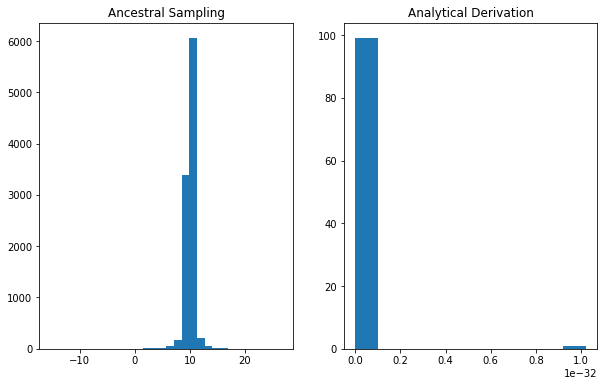

In [6]:
print("Plot")
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# Plots
ax[0].hist(sampled["w"], bins=30, orientation='vertical')
ax[0].set_title("Ancestral Sampling")
ax[1].hist(results)
ax[1].set_title("Analytical Derivation")

## Problem 3 - Implement Monte Cralo for estimating multi-dimensional Gaussian Integrals

In [7]:
from numpy.linalg import cholesky
def monte_carlo_normal(m, S, iterations=1):
  L = cholesky(S)
  # Check that Decomposition worked
  np.testing.assert_array_almost_equal(S, (L @ L.T))
  r_values = []
  mean_r_values = []
  for iter in range(iterations):
    f = get_normal(0, 1, size=m.shape)
    r = m+L@f
    r_values.append(r)
    r_values_np_curr = np.array(r_values)
    mean_r = np.sum(r_values_np_curr, axis=0)/r_values_np_curr.shape[0]
    mean_r_values.append(mean_r)
  print(mean_r)
  return np.array(r_values), np.array(mean_r_values)

In [8]:
m = np.array([[1, 2, 3]]).T
S = np.array([[1, 1/2, 0], [1/2, 1, 0], [0, 0, 1]])
iterations = 1500
rs, mean_rs = monte_carlo_normal(m, S, iterations)


[[1.00435298]
 [2.04033732]
 [3.01061581]]


Plot


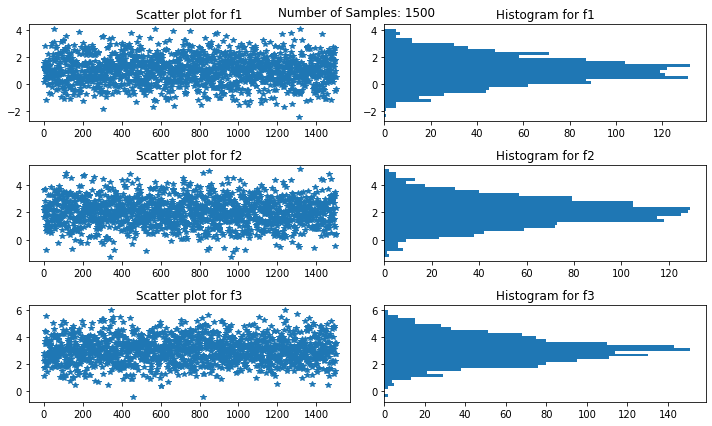

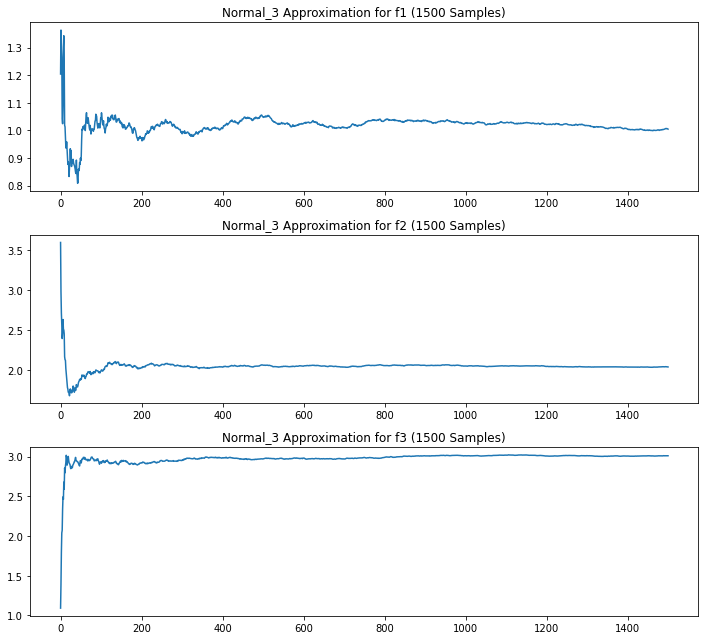

In [9]:
print("Plot")
# Create figure
fig, ax = plt.subplots(3, 2, figsize=(10, 6))
fig.suptitle(f"Number of Samples: {len(rs)}")
# Create x
x = np.arange(len(rs))
# Plots
for feat_id in range(rs.shape[1]):
  ax[feat_id][0].plot(x, rs.T[:, feat_id].flatten(), '*')
  ax[feat_id][1].hist(rs.T[:, feat_id].flatten(), bins=30, orientation='horizontal')
  ax[feat_id][0].set_title(f"Scatter plot for f{feat_id+1}")
  ax[feat_id][1].set_title(f"Histogram for f{feat_id+1}")
fig.tight_layout()

fig2, ax2 = plt.subplots(3, 1, figsize=(9.9, 9))
for feat_id in range(rs.shape[1]):
  ax2[feat_id].plot(x, mean_rs.T[:, feat_id].flatten(), '-')
  ax2[feat_id].set_title(f"Normal_3 Approximation for f{feat_id+1} ({len(rs)} Samples)")
fig2.tight_layout()